# EXAMÉN CIENCIA DE DATOS PARA LA ECONOMÍA: IGNACIO CHANDIA #

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('nba_logreg2.csv', sep = ";")
df.head(3)

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0


A continuación se presenta una dataset sobre métricas de rendimientos de jugadores de la NBA durante su carrera, junto con la variable target si la carrera del basquetbolista supera o no los 5 años.

A continuación se detalla las variables que componen este dataset:

| Nombre columnas | Contenido |
|--- | --- |
|Name   |Nombre |
| GP    |Juegos jugados |
| MIN   |Minutos jugados |
| PTS   |Puntos por partido |
| FGM   |Objetivos de campo realizados |
| FGA   |Objetivos de campo intentados |
| FG%   |Porcentaje de puntos de campo |
| 3P Mode   |3 puntos hecho |
| 3PA   |Intentos de 3 puntos |
| 3P%   |3 puntos por ciento |
| FTM   |Tiro libre hecho |
| FTA   |Intentos de lanzamiento libre |
| FT%   |Porcentaje de lanzamiento libre |
| OREB  |Rebotes ofensivos |
| DREB  |Rebotes defensivos |
| REB   |Rebotes |
| AST   |Asistencias |
| STL   |Roba |
| BLK   |Bloques |
| TOV   |Pérdidas de balón |
| TARGET_5Yrs   |Variable predictora (1-Si la duración de la carrera>= 5 años) y (0-si<5) |



In [3]:
# Descripción de los datos
print(df.describe())

                GP          MIN          PTS          FGM          FGA  \
count  1329.000000  1329.000000  1329.000000  1329.000000  1329.000000   
mean     60.402558    17.647931     6.820166     2.634763     5.902483   
std      17.481092     8.327441     4.365671     1.686850     3.598820   
min      11.000000     3.100000     0.700000     0.300000     0.800000   
25%      47.000000    10.800000     3.700000     1.400000     3.300000   
50%      63.000000    16.100000     5.600000     2.100000     4.800000   
75%      77.000000    22.900000     8.800000     3.400000     7.500000   
max      82.000000    40.900000    28.200000    10.200000    19.800000   

               FG%      3P Made          3PA          3P%          FTM  \
count  1329.000000  1329.000000  1329.000000  1329.000000  1329.000000   
mean     44.117532     0.249661     0.785628    19.308126     1.302784   
std       6.119492     0.384608     1.063856    16.022916     0.989341   
min      23.800000     0.000000     0

In [4]:
print(df.head())

              Name  GP   MIN  PTS  FGM  FGA   FG%  3P Made  3PA   3P%  ...  \
0   Brandon Ingram  36  27.4  7.4  2.6  7.6  34.7      0.5  2.1  25.0  ...   
1  Andrew Harrison  35  26.9  7.2  2.0  6.7  29.6      0.7  2.8  23.5  ...   
2   JaKarr Sampson  74  15.3  5.2  2.0  4.7  42.2      0.4  1.7  24.4  ...   
3      Malik Sealy  58  11.6  5.7  2.3  5.5  42.6      0.1  0.5  22.6  ...   
4      Matt Geiger  48  11.5  4.5  1.6  3.0  52.4      0.0  0.1   0.0  ...   

   FTA   FT%  OREB  DREB  REB  AST  STL  BLK  TOV  TARGET_5Yrs  
0  2.3  69.9   0.7   3.4  4.1  1.9  0.4  0.4  1.3          0.0  
1  3.4  76.5   0.5   2.0  2.4  3.7  1.1  0.5  1.6          0.0  
2  1.3  67.0   0.5   1.7  2.2  1.0  0.5  0.3  1.0          0.0  
3  1.3  68.9   1.0   0.9  1.9  0.8  0.6  0.1  1.0          1.0  
4  1.9  67.4   1.0   1.5  2.5  0.3  0.3  0.4  0.8          1.0  

[5 rows x 21 columns]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1329 non-null   object 
 1   GP           1329 non-null   int64  
 2   MIN          1329 non-null   float64
 3   PTS          1329 non-null   float64
 4   FGM          1329 non-null   float64
 5   FGA          1329 non-null   float64
 6   FG%          1329 non-null   float64
 7   3P Made      1329 non-null   float64
 8   3PA          1329 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1329 non-null   float64
 11  FTA          1329 non-null   float64
 12  FT%          1329 non-null   float64
 13  OREB         1329 non-null   float64
 14  DREB         1329 non-null   float64
 15  REB          1329 non-null   float64
 16  AST          1329 non-null   float64
 17  STL          1329 non-null   float64
 18  BLK          1329 non-null   float64
 19  TOV   

In [7]:
variablescontinuas = [
    'MIN',
    'PTS',
    'FGM',
    'FGA',
    'FG%',
    '3P Made',
    '3PA',
    '3P%',
    'FTM',
    'FTA',
    'FT%',
    'OREB',
    'DREB',
    'REB',
   'AST',
    'STL',
    'BLK',
    'TOV'
]

df_1 = df[variablescontinuas]

df_1.head()

,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3
1,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6
2,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0
3,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0
4,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8


En el paso anterior, se quitó la columna name, pues no es continua y genera problemas con las visualizaciones, ademas de la variable predecida.

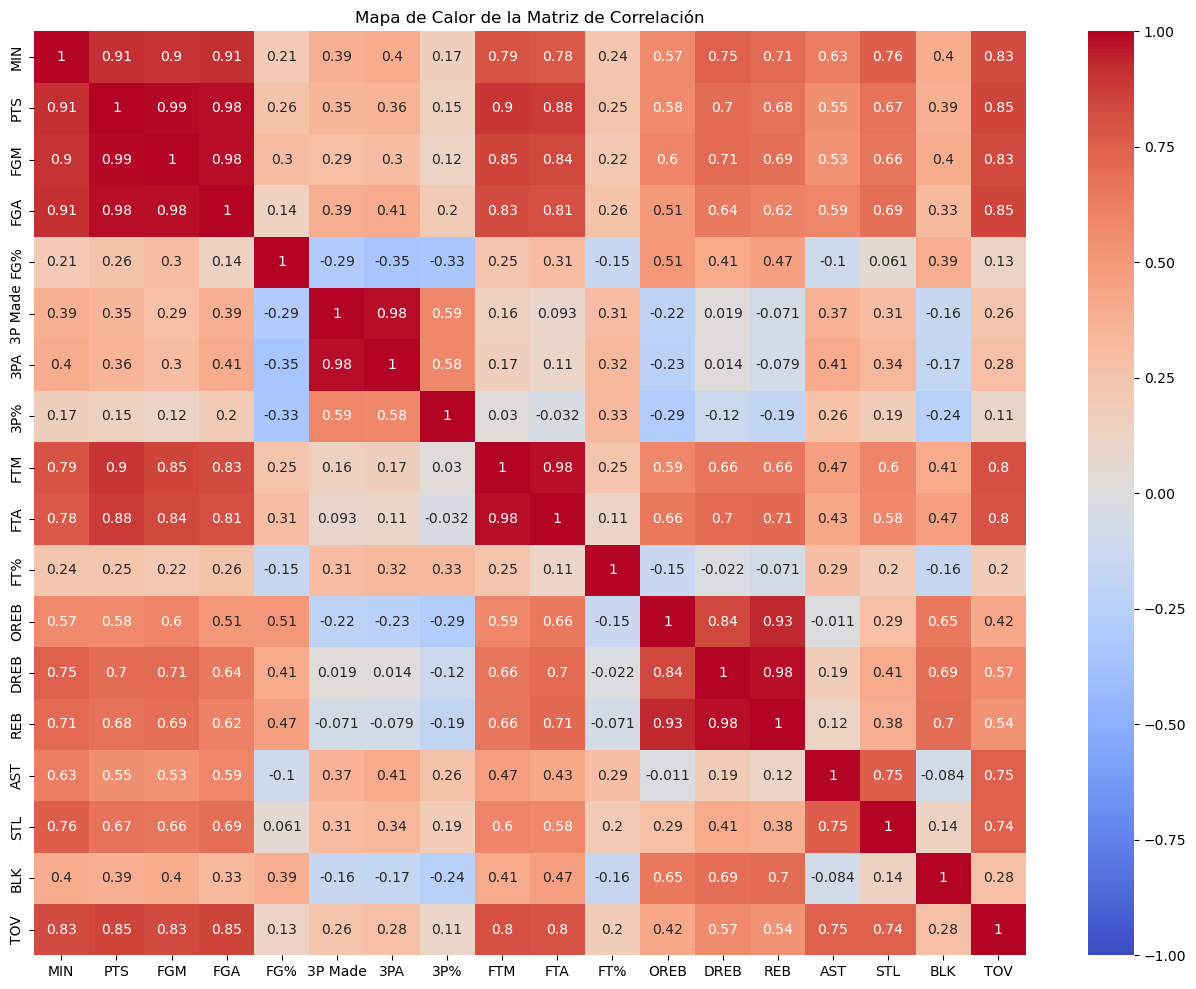

In [8]:
plt.figure(figsize=(16, 12))
correlation_matrix = df_1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

La primera parte del proyecto fue realizada con éxito, donde fueron descritas las variables y se visualizan con el gráfico de correlación, para ver la relación de cada variable.


# Ahora realizaremos la segunda parte del exámen, con un análisis PCA